Para abrir o notebook no Google Colab, altere o domínio `github.com` para `githubtocolab.com`

<div class="alert alert-block alert-danger">
Para praticar programação, é importante que você erre, leia as mensagens de erro e tente corrigí-los.
    
Dessa forma, no Google Colab, é importante que você DESATIVE OS RECURSOS DE AUTOCOMPLETAR:

- Menu Ferramentas -> Configurações
- Na janela que é aberta:
  - Seção Editor -> Desativar "Mostrar sugestões de preenchimento de código com base no contexto"
  - Seção Assistência de IA -> Desabilitar itens

Na versão em inglês:

- Menu Tools -> Settings
- Na janela que é aberta:
  - Seção Editor -> Desativar "Show context-powered code completions"
  - Seção AI Assistance -> Desabilitar itens
</div>

# PSI5892 - Aula de Exercícios

# Perceptron de Rosenblatt e Regressão Logística

# Exercício 1

Neste exercício vamos utilizar o neurônio de Rosenblatt para implementar a função lógica AND.

Iniciamos importando as bibliotecas necessárias para implementar o neurônio de Rosenblatt.

In [8]:
import numpy as np
import matplotlib.pyplot as plt

Vamos gerar os dados de treinamento do problema começando pelo AND.

<div class="alert alert-block alert-success">
Complete o código a seguir:
</div>

In [9]:
Nt = 100  # número de pontos de treinamento

#############
# x deve ser uma matriz com Nt linhas e 2 colunas com valores 0 ou 1 aleatórios,
# que pode ser gerada usando as funções np.round e np.random.uniform.
# d deve ser um vetor coluna com Nt linhas contendo o resultado da função lógica
# AND aplicada ao vetor x. Para isso use a função np.logical_and.
# Note que a função np.logical_and devolve um vetor com elementos do tipo boolean.
# Para transformar os elementos para o tipo inteiro, basta multiplicá-lo por 1
# ou usar o método .astype(int)

x = np.random.uniform(0, 1, (Nt, 2))
x = 1*(x > 0.5)
d = 1*(np.logical_and(x[:, 0], x[:, 1]))

#############

A função a seguir implementa o neurônio de Rosenblatt no modo mini-batch. Modifique o programa do algoritmo LMS no modo mini- inserindo a função de ativação.
Para obter 0 ou 1 na saída, deve-se usar a função degrau em vez da função sinal. Para isso, use a função `np.heaviside`.
Uma outra modificação que deve ser considerada é a inicialização dos pesos e bias, que agora devem ser inicializados com valores aleatórios uniformemente distribuídos no intervalo [-dw, dw].

<div class="alert alert-block alert-success">
Complete o código a seguir:
</div>

In [10]:
def Rosenblatt_minibatch(x, d, eta, Nt, Ne, Nb, dw):
    """
    W = Rosenblatt_minibatch(x, d, eta, Nt, Ne, Nb)
    x: sinal de entrada
    d: sinal desejado
    eta: passo de adaptação
    Nt: número de dados de treinamento
    Ne: número de épocas
    Nb: tamanho do mini-batch
    dw: inicialização dos pesos e bias com distribuição uniforme no invervalo [-dw, dw]
    """
    """
    Novamente, vamos juntar o sinal de entrada e o sinal desejado em um único vetor,
    uma vez que a cada época vamos embaralhar os dados.
    Ao fazer isso, já inserimos uma coluna de 1's para levar em conta o bias.
    """
    #############

    M = x.shape[1]

    Nmb = int(np.floor(Nt / Nb))

    # Inicializa o vetor de histórico de pesos com valores aleatórios
    # uniformemente distribuídos no intervalo [-dw, dw]
    W = np.zeros((Ne * Nmb + 1, M + 1))
    W[0, :] = np.random.uniform(-dw, dw, (1, M + 1))

    # Junta bias, dados de entrada (x) e sinal desejado (d)
    d = d.reshape(-1, 1)
    Xd = np.hstack((np.ones((Nt, 1)), x, d))

    # Passo de adaptação dividido por Nb
    eta = eta / Nb

    for k in range(Ne):
      # Embaralha os dados de treinamento junto com os rótulos a cada época
      np.random.shuffle(Xd)

      x = Xd[:, 0 : M + 1]
      d = Xd[:, [M + 1]]

      for l in range(Nmb):

        # Pega os dados de treinamento (sinal de entrada e sinal desejado) do mini-batch atual
        dmb = d[(l * Nb):(l + 1) * Nb]
        xmb = x[(l * Nb):(l + 1) * Nb, :]

        m = k * Nmb + l

        # Vetor de pesos da iteração anterior
        w = W[m, :].reshape(-1, 1)

        # Saída
        v = xmb @ w

        # Calcula a saída utilizando a função de ativação
        # função de ativação -> função degrau (heaviside)
        y = np.heaviside(v, 0)

        # Erro do mini-batch
        emb = dmb - y

        # Atualiza os pesos
        W[[m + 1], :] = (w + eta * (xmb.T @ emb)).T

    return W
    #############



In [11]:
eta = 0.5  # passo de adaptação do algoritmo de Rosenblatt
Nb = 20
Ne = 100
dw = 2

#############  Complete o código a seguir
W = Rosenblatt_minibatch(x, d, eta, Nt, Ne, Nb, dw)

# Wfinal deve ser os valores de pesos e bias da última iteração
Wfinal = W[-1, :]
print(Wfinal)
#############

[-0.99133791  0.7017819   0.45441971]


<div class="alert alert-block alert-success">
Complete o código a seguir:
</div>

5


Text(0.5, 1.0, 'Pesos de Rosenblatt no modo mini-batch (em preto)')

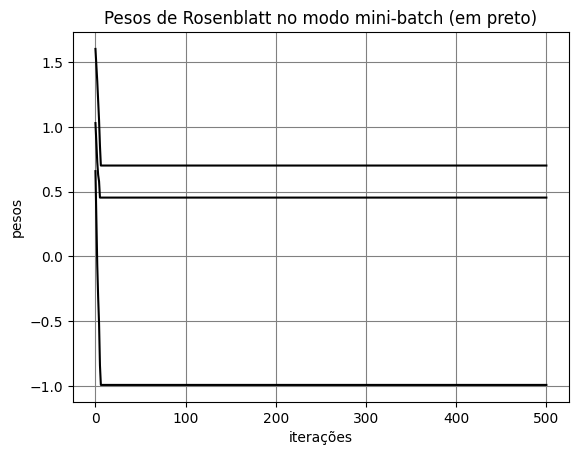

In [12]:
# Gere um gráfico para mostrar os pesos e bias ao longo das iterações
Nmb = int(np.floor(Nt / Nb))
print(Nmb)
plt.plot(W, "k", label="Rosenblatt")
plt.xlabel("iterações")
plt.ylabel("pesos")
plt.grid(axis="x", color="0.5")
plt.grid(axis="y", color="0.5")
plt.title(
    "Pesos de Rosenblatt no modo mini-batch (em preto)"
)

<div class="alert alert-block alert-success">
Complete o código a seguir:
</div>

Taxa de erro: 0.00%


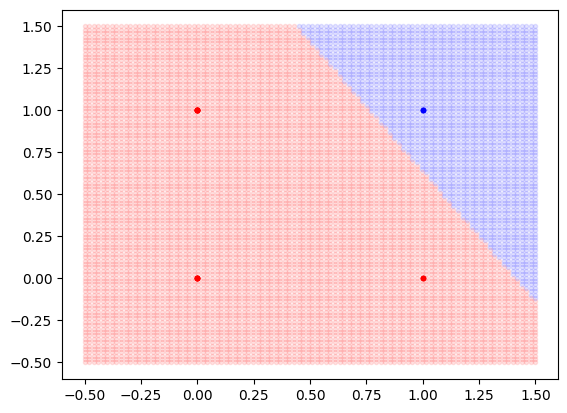

In [13]:
# Gere os dados de teste, calcule a taxa de erro e gere a reta de separação das
# regiões, mostrando em um mesmo gráfico a reta e os dados de teste classificados.
# Comente o resultado, explicando se é possível utilizar o neurônio de Rosenblatt
# para implementar esta função lógica.

N_teste = 20 # número de pontos de teste

x_teste = np.random.uniform(0, 1, (N_teste, 2))
x_teste = 1*(x_teste > 0.5)
d_teste = 1*(np.logical_and(x_teste[:, 0], x_teste[:, 1]))

# Inserindo 1's no vetor de entrada
b = np.ones((N_teste, 1))
x_teste = np.hstack((b, x_teste))
v_teste = x_teste @ Wfinal
y_teste = np.heaviside(v_teste, 0)

# Taxa de erro
Taxa_de_erro = 100 - np.mean(y_teste == d_teste) * 100

print(f"Taxa de erro: {Taxa_de_erro:.2f}%")


# Gera a curva de separação das duas regiões
# Dados da curva de separação
Nsep = 100
x1S = np.linspace(-0.5, 1.5, Nsep).reshape(-1, 1)
x2S = np.linspace(-0.5, 1.5, Nsep).reshape(-1, 1)

# Gera pontos da grade
xx1S, xx2S = np.meshgrid(x1S, x2S)
xx1S = xx1S.reshape(-1, 1)
xx2S = xx2S.reshape(-1, 1)

# Gera array x
xgrid = np.hstack((xx1S, xx2S))
Ngrid = len(xgrid)
b = np.ones((Ngrid, 1))
xgrid = np.hstack((b, xgrid))

# Calcula saída para cada ponto da grade
ygrid = np.sign(xgrid @ Wfinal)

# Plota os pontos principais
fig, ax2 = plt.subplots()
for i in range(N_teste):
    if d_teste[i] == 1:
        ax2.plot(x_teste[i, 1], x_teste[i, 2], ".b")
    else:
        ax2.plot(x_teste[i, 1], x_teste[i, 2], ".r")

# Plota pontos da grade com saída -1 (usa transparência alpha)
l0 = np.where(ygrid == -1)[0]
ax2.plot(xgrid[l0, 1], xgrid[l0, 2], "r.", alpha=0.1)

# Plota pontos da grade com saída 1 (usa transparência alpha)
l1 = np.where(ygrid == 1)[0]
ax2.plot(xgrid[l1, 1], xgrid[l1, 2], "b.", alpha=0.1)
#############



### Comentários

Podemos ver pela reta de separação que é possível utilizar o neurônio de Rosenblatt para implementar a função lógica de AND. A fronteira de separação decorrente dos valores do vetor de pesos e bias neste caso é uma reta e conseguiu separar o par (1, 1) que pertence a classe 1 (saída +1) dos pares {(0, 0), (0, 1), (1, 0)} que pertence a classe 0 (saída 0).

# Exercício 2

Repita o exercício anterior considerando as portas lógicas OR e o XOR.

## Resolução

### Considerando a porta OR

In [14]:
Nt = 100  # número de pontos de treinamento

# Considerando a porta lógica OR
x = np.random.uniform(0, 1, (Nt, 2))
x = 1*(x > 0.5)
d = 1*(np.logical_or(x[:, 0], x[:, 1]))
#############

In [15]:
eta = 0.5  # passo de adaptação do algoritmo de Rosenblatt
Nb = 20
Ne = 100
dw = 2

W = Rosenblatt_minibatch(x, d, eta, Nt, Ne, Nb, dw)

Wfinal = W[-1, :]
print(Wfinal)

[-0.08831919  0.22733151  1.6595022 ]


5


Text(0.5, 1.0, 'Pesos de Rosenblatt no modo mini-batch (em preto)')

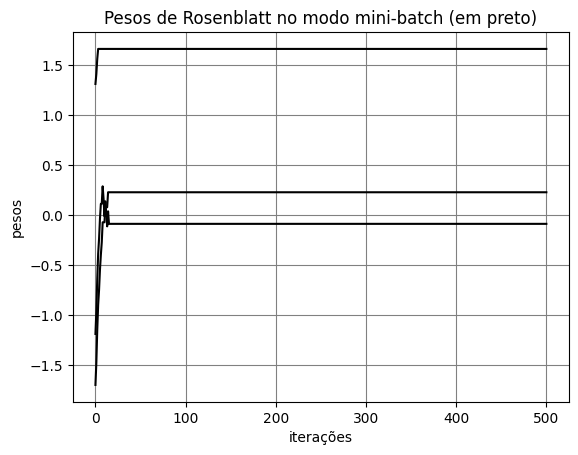

In [16]:
# Gere um gráfico para mostrar os pesos e bias ao longo das iterações
Nmb = int(np.floor(Nt / Nb))
print(Nmb)
plt.plot(W, "k", label="Rosenblatt")
plt.xlabel("iterações")
plt.ylabel("pesos")
plt.grid(axis="x", color="0.5")
plt.grid(axis="y", color="0.5")
plt.title(
    "Pesos de Rosenblatt no modo mini-batch (em preto)"
)

Taxa de erro: 0.00%


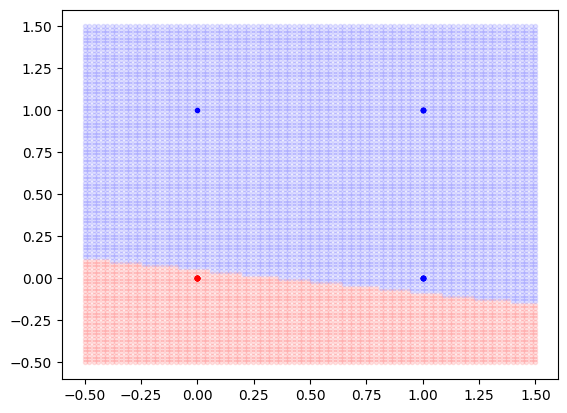

In [17]:
# Gere os dados de teste, calcule a taxa de erro e gere a reta de separação das
# regiões, mostrando em um mesmo gráfico a reta e os dados de teste classificados.
# Comente o resultado, explicando se é possível utilizar o neurônio de Rosenblatt
# para implementar esta função lógica.

N_teste = 20 # número de pontos de teste

x_teste = np.random.uniform(0, 1, (N_teste, 2))
x_teste = 1*(x_teste > 0.5)
d_teste = 1*(np.logical_or(x_teste[:, 0], x_teste[:, 1]))

# Inserindo 1's no vetor de entrada
b = np.ones((N_teste, 1))
x_teste = np.hstack((b, x_teste))
v_teste = x_teste @ Wfinal
y_teste = np.heaviside(v_teste, 0)

# Taxa de erro
Taxa_de_erro = 100 - np.mean(y_teste == d_teste) * 100

print(f"Taxa de erro: {Taxa_de_erro:.2f}%")


# Gera a curva de separação das duas regiões
# Dados da curva de separação
Nsep = 100
x1S = np.linspace(-0.5, 1.5, Nsep).reshape(-1, 1)
x2S = np.linspace(-0.5, 1.5, Nsep).reshape(-1, 1)

# Gera pontos da grade
xx1S, xx2S = np.meshgrid(x1S, x2S)
xx1S = xx1S.reshape(-1, 1)
xx2S = xx2S.reshape(-1, 1)

# Gera array x
xgrid = np.hstack((xx1S, xx2S))
Ngrid = len(xgrid)
b = np.ones((Ngrid, 1))
xgrid = np.hstack((b, xgrid))

# Calcula saída para cada ponto da grade
ygrid = np.sign(xgrid @ Wfinal)

# Plota os pontos principais
fig, ax2 = plt.subplots()
for i in range(N_teste):
    if d_teste[i] == 1:
        ax2.plot(x_teste[i, 1], x_teste[i, 2], ".b")
    else:
        ax2.plot(x_teste[i, 1], x_teste[i, 2], ".r")

# Plota pontos da grade com saída -1 (usa transparência alpha)
l0 = np.where(ygrid == -1)[0]
ax2.plot(xgrid[l0, 1], xgrid[l0, 2], "r.", alpha=0.1)

# Plota pontos da grade com saída 1 (usa transparência alpha)
l1 = np.where(ygrid == 1)[0]
ax2.plot(xgrid[l1, 1], xgrid[l1, 2], "b.", alpha=0.1)
#############



### Considerando a porta XOR

In [18]:
Nt = 100  # número de pontos de treinamento

# Considerando a porta lógica OR
x = np.random.uniform(0, 1, (Nt, 2))
x = 1*(x > 0.5)
d = 1*(np.logical_xor(x[:, 0], x[:, 1]))
#############

In [19]:
eta = 0.5  # passo de adaptação do algoritmo de Rosenblatt
Nb = 20
Ne = 100
dw = 2

W = Rosenblatt_minibatch(x, d, eta, Nt, Ne, Nb, dw)

Wfinal = W[-1, :]
print(Wfinal)

[-0.18265581 -0.26083993 -0.37522719]


5


Text(0.5, 1.0, 'Pesos de Rosenblatt no modo mini-batch (em preto)')

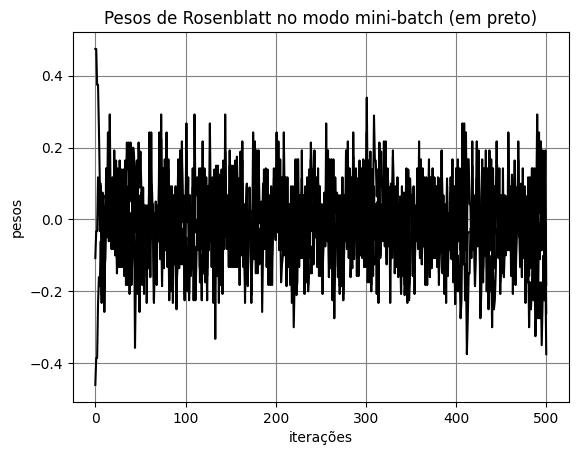

In [20]:
# Gere um gráfico para mostrar os pesos e bias ao longo das iterações
Nmb = int(np.floor(Nt / Nb))
print(Nmb)
plt.plot(W, "k", label="Rosenblatt")
plt.xlabel("iterações")
plt.ylabel("pesos")
plt.grid(axis="x", color="0.5")
plt.grid(axis="y", color="0.5")
plt.title(
    "Pesos de Rosenblatt no modo mini-batch (em preto)"
)

Taxa de erro: 55.00%


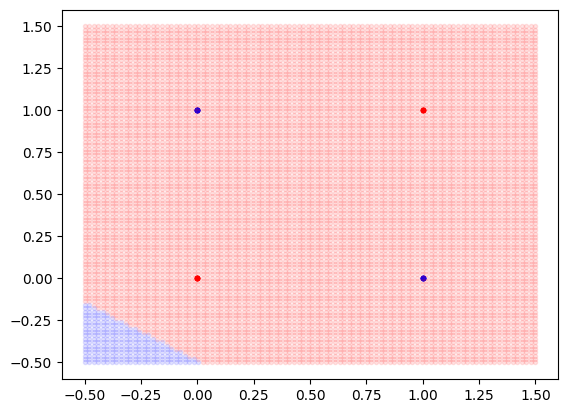

In [21]:
# Gere os dados de teste, calcule a taxa de erro e gere a reta de separação das
# regiões, mostrando em um mesmo gráfico a reta e os dados de teste classificados.
# Comente o resultado, explicando se é possível utilizar o neurônio de Rosenblatt
# para implementar esta função lógica.

N_teste = 20 # número de pontos de teste

x_teste = np.random.uniform(0, 1, (N_teste, 2))
x_teste = 1*(x_teste > 0.5)
d_teste = 1*(np.logical_xor(x_teste[:, 0], x_teste[:, 1]))

# Inserindo 1's no vetor de entrada
b = np.ones((N_teste, 1))
x_teste = np.hstack((b, x_teste))
v_teste = x_teste @ Wfinal
y_teste = np.heaviside(v_teste, 0)

# Taxa de erro
Taxa_de_erro = 100 - np.mean(y_teste == d_teste) * 100

print(f"Taxa de erro: {Taxa_de_erro:.2f}%")


# Gera a curva de separação das duas regiões
# Dados da curva de separação
Nsep = 100
x1S = np.linspace(-0.5, 1.5, Nsep).reshape(-1, 1)
x2S = np.linspace(-0.5, 1.5, Nsep).reshape(-1, 1)

# Gera pontos da grade
xx1S, xx2S = np.meshgrid(x1S, x2S)
xx1S = xx1S.reshape(-1, 1)
xx2S = xx2S.reshape(-1, 1)

# Gera array x
xgrid = np.hstack((xx1S, xx2S))
Ngrid = len(xgrid)
b = np.ones((Ngrid, 1))
xgrid = np.hstack((b, xgrid))

# Calcula saída para cada ponto da grade
ygrid = np.sign(xgrid @ Wfinal)

# Plota os pontos principais
fig, ax2 = plt.subplots()
for i in range(N_teste):
    if d_teste[i] == 1:
        ax2.plot(x_teste[i, 1], x_teste[i, 2], ".b")
    else:
        ax2.plot(x_teste[i, 1], x_teste[i, 2], ".r")

# Plota pontos da grade com saída -1 (usa transparência alpha)
l0 = np.where(ygrid == -1)[0]
ax2.plot(xgrid[l0, 1], xgrid[l0, 2], "r.", alpha=0.1)

# Plota pontos da grade com saída 1 (usa transparência alpha)
l1 = np.where(ygrid == 1)[0]
ax2.plot(xgrid[l1, 1], xgrid[l1, 2], "b.", alpha=0.1)
#############



# Exercício 3

Repita o exercício para as portas lógicas AND, OR e XOR considerando a otimização do modelo utilizando a regressão logística com as seguintes funções custo:
- Erro quadrático médio
- Entropia cruzada

## Resolução

### Modelos para Erro Quadrático Médio e Entropia Cruzada usando função sigmoidal como função de ativação

In [22]:
# Modelo para função custo: Erro quadrático médio

def Rosenblatt_minibatch_MSE(x, d, eta, Nt, Ne, Nb, dw):
    """
    W = Rosenblatt_minibatch_MSE(x, d, eta, Nt, Ne, Nb)
    x: sinal de entrada
    d: sinal desejado
    eta: passo de adaptação
    Nt: número de dados de treinamento
    Ne: número de épocas
    Nb: tamanho do mini-batch
    dw: inicialização dos pesos e bias com distribuição uniforme no invervalo [-dw, dw]
    """
    """
    Novamente, vamos juntar o sinal de entrada e o sinal desejado em um único vetor,
    uma vez que a cada época vamos embaralhar os dados.
    Ao fazer isso, já inserimos uma coluna de 1's para levar em conta o bias.
    """
    #############

    M = x.shape[1]

    Nmb = int(np.floor(Nt / Nb))

    # Inicializa o vetor de histórico de pesos com valores aleatórios
    # uniformemente distribuídos no intervalo [-dw, dw]
    W = np.zeros((Ne * Nmb + 1, M + 1))
    W[0, :] = np.random.uniform(-dw, dw, (1, M + 1))

    # Junta bias, dados de entrada (x) e sinal desejado (d)
    d = d.reshape(-1, 1)
    Xd = np.hstack((np.ones((Nt, 1)), x, d))

    for k in range(Ne):
      # Embaralha os dados de treinamento junto com os rótulos a cada época
      np.random.shuffle(Xd)

      x = Xd[:, 0 : M + 1]
      d = Xd[:, [M + 1]]

      for l in range(Nmb):

        # Pega os dados de treinamento (sinal de entrada e sinal desejado) do mini-batch atual
        dmb = d[(l * Nb):(l + 1) * Nb]
        xmb = x[(l * Nb):(l + 1) * Nb, :]

        m = k * Nmb + l

        # Vetor de pesos da iteração anterior
        w = W[m, :].reshape(-1, 1)

        # Saída
        v = xmb @ w

        # Calcula a saída utilizando a função de ativação
        # função de ativação -> função sigmoidal
        y = 1 / (1 + np.exp(-v))

        # Computa o erro do mini-batch
        emb = dmb - y

        # Custo (MSE)
        # J_MSE = (1/2)*np.sum((dmb - y) ** 2) (Quem queremos minimizar)

        # Computa a derivada da função de ativação (y(1-y))
        phi_derivada = y * (1 - y)

        # Gradiente do Custo em relação a w
        # deltaJ = gradiente do custo em relação a y * gradiente de y em relação a v * gradiente de v em relação a w
        #        = deltaJ/y * deltay/v * deltav/w
        #        = - 2 * e(n) * x(n) * phi'(v(n))
        deltaJ = -1 * (xmb.T @ (emb * phi_derivada)) / Nb

        # Atualiza os pesos
        # MSE, sgm: w(n) = w(n-1) + (1/2) * eta * deltaJ
        #                = w(n-1) - eta * e(n) * phi'(v(n)) * x(n)
        #                = w(n-1) - eta * emb * y * (1 - y) * xmb
        W[[m + 1], :] = (w - eta * deltaJ).T

    return W


In [23]:

# Modelo para função custo: Entropia Cruzada

def Rosenblatt_minibatch_EC(x, d, eta, Nt, Ne, Nb, dw):
    """
    W = Rosenblatt_minibatch_EC(x, d, eta, Nt, Ne, Nb)
    x: sinal de entrada
    d: sinal desejado
    eta: passo de adaptação
    Nt: número de dados de treinamento
    Ne: número de épocas
    Nb: tamanho do mini-batch
    dw: inicialização dos pesos e bias com distribuição uniforme no invervalo [-dw, dw]
    """
    """
    Novamente, vamos juntar o sinal de entrada e o sinal desejado em um único vetor,
    uma vez que a cada época vamos embaralhar os dados.
    Ao fazer isso, já inserimos uma coluna de 1's para levar em conta o bias.
    """
    #############

    M = x.shape[1]

    Nmb = int(np.floor(Nt / Nb))

    # Inicializa o vetor de histórico de pesos com valores aleatórios
    # uniformemente distribuídos no intervalo [-dw, dw]
    W = np.zeros((Ne * Nmb + 1, M + 1))
    W[0, :] = np.random.uniform(-dw, dw, (1, M + 1))

    # Junta bias, dados de entrada (x) e sinal desejado (d)
    d = d.reshape(-1, 1)
    Xd = np.hstack((np.ones((Nt, 1)), x, d))

    for k in range(Ne):
      # Embaralha os dados de treinamento junto com os rótulos a cada época
      np.random.shuffle(Xd)

      x = Xd[:, 0 : M + 1]
      d = Xd[:, [M + 1]]

      for l in range(Nmb):

        # Pega os dados de treinamento (sinal de entrada e sinal desejado) do mini-batch atual
        dmb = d[(l * Nb):(l + 1) * Nb]
        xmb = x[(l * Nb):(l + 1) * Nb, :]

        m = k * Nmb + l

        # Vetor de pesos da iteração anterior
        w = W[m, :].reshape(-1, 1)

        # Saída
        v = xmb @ w

        # Calcula a saída utilizando a função de ativação
        # função de ativação -> função sigmoidal
        y = 1 / (1 + np.exp(-v))

        # Computa o erro do mini-batch
        emb = dmb - y

        # Custo (Entropia Cruzada)
        # J_EC = -[d * ln(y) + (1 - d) * ln(1 - y)] (Quem queremos minimizar)

        # Computa a derivada da função de ativação (y(1-y))
        phi_derivada = y * (1 - y)

        # Gradiente do Custo em relação a w
        # deltaJ = gradiente do custo em relação a y * gradiente de y em relação a v * gradiente de v em relação a w
        #        = deltaJ/y * deltay/v * deltav/w
        #        = - e(n) * x(n) * phi'(v(n)) / [ y(n) * (1 - y(n))]

        # O interessante da combinação EC + sigmoide é que o denominador
        # de deltaJ cancela com phi'(v(n)), portanto podemos reduzir a equação
        # de atualização para:
        # w(n) = w(n-1) + eta * e(n) * x(n)

        # Atualiza os pesos
        W[[m + 1], :] = (w + eta * (xmb.T @ emb) / Nb).T

    return W


### Porta lógica AND - Erro Quadrático Médio

In [24]:
Nt = 100  # número de pontos de treinamento

# Considerando a porta lógica AND
x = np.random.uniform(0, 1, (Nt, 2))
x = 1*(x > 0.5)
d = 1*(np.logical_and(x[:, 0], x[:, 1]))
#############

In [25]:
eta = 0.5  # passo de adaptação do algoritmo de Rosenblatt
Nb = 20
Ne = 200
dw = 2

W = Rosenblatt_minibatch_MSE(x, d, eta, Nt, Ne, Nb, dw)

Wfinal = W[-1, :]
print(Wfinal)

[-4.32643339  2.69288385  2.77714913]


5


Text(0.5, 1.0, 'Pesos de Rosenblatt no modo mini-batch (em preto)')

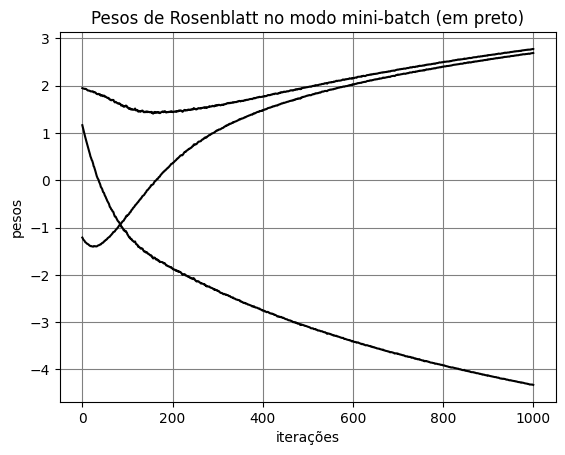

In [26]:
# Gere um gráfico para mostrar os pesos e bias ao longo das iterações
Nmb = int(np.floor(Nt / Nb))
print(Nmb)
plt.plot(W, "k", label="Rosenblatt")
plt.xlabel("iterações")
plt.ylabel("pesos")
plt.grid(axis="x", color="0.5")
plt.grid(axis="y", color="0.5")
plt.title(
    "Pesos de Rosenblatt no modo mini-batch (em preto)"
)

Taxa de erro: 0.00%


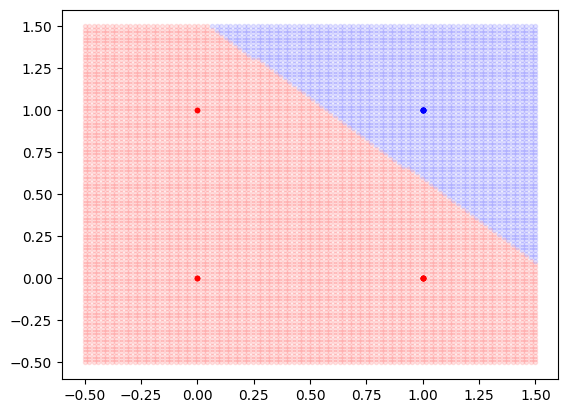

In [27]:
N_teste = 20 # número de pontos de teste

x_teste = np.random.uniform(0, 1, (N_teste, 2))
x_teste = 1*(x_teste > 0.5)
d_teste = 1*(np.logical_and(x_teste[:, 0], x_teste[:, 1]))

# Inserindo 1's no vetor de entrada
b = np.ones((N_teste, 1))
x_teste = np.hstack((b, x_teste))
v_teste = x_teste @ Wfinal
y_teste = np.heaviside(v_teste, 0)

# Taxa de erro
Taxa_de_erro = 100 - np.mean(y_teste == d_teste) * 100

print(f"Taxa de erro: {Taxa_de_erro:.2f}%")


# Gera a curva de separação das duas regiões
# Dados da curva de separação
Nsep = 100
x1S = np.linspace(-0.5, 1.5, Nsep).reshape(-1, 1)
x2S = np.linspace(-0.5, 1.5, Nsep).reshape(-1, 1)

# Gera pontos da grade
xx1S, xx2S = np.meshgrid(x1S, x2S)
xx1S = xx1S.reshape(-1, 1)
xx2S = xx2S.reshape(-1, 1)

# Gera array x
xgrid = np.hstack((xx1S, xx2S))
Ngrid = len(xgrid)
b = np.ones((Ngrid, 1))
xgrid = np.hstack((b, xgrid))

# Calcula saída para cada ponto da grade
ygrid = np.sign(xgrid @ Wfinal)

# Plota os pontos principais
fig, ax2 = plt.subplots()
for i in range(N_teste):
    if d_teste[i] == 1:
        ax2.plot(x_teste[i, 1], x_teste[i, 2], ".b")
    else:
        ax2.plot(x_teste[i, 1], x_teste[i, 2], ".r")

# Plota pontos da grade com saída -1 (usa transparência alpha)
l0 = np.where(ygrid == -1)[0]
ax2.plot(xgrid[l0, 1], xgrid[l0, 2], "r.", alpha=0.1)

# Plota pontos da grade com saída 1 (usa transparência alpha)
l1 = np.where(ygrid == 1)[0]
ax2.plot(xgrid[l1, 1], xgrid[l1, 2], "b.", alpha=0.1)
#############



### Porta lógica AND - Entropia Cruzada

In [28]:
Nt = 100  # número de pontos de treinamento

# Considerando a porta lógica AND
x = np.random.uniform(0, 1, (Nt, 2))
x = 1*(x > 0.5)
d = 1*(np.logical_and(x[:, 0], x[:, 1]))
#############

In [29]:
eta = 0.5  # passo de adaptação do algoritmo de Rosenblatt
Nb = 20
Ne = 200
dw = 2

W = Rosenblatt_minibatch_EC(x, d, eta, Nt, Ne, Nb, dw)

Wfinal = W[-1, :]
print(Wfinal)

[-9.2169406   5.91725402  6.12377492]


5


Text(0.5, 1.0, 'Pesos de Rosenblatt no modo mini-batch (em preto)')

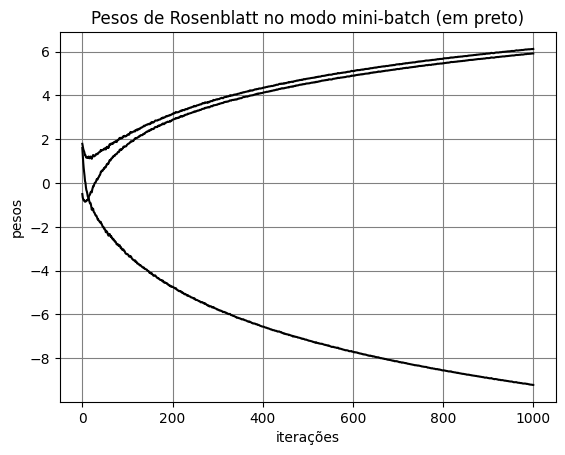

In [30]:
# Gere um gráfico para mostrar os pesos e bias ao longo das iterações
Nmb = int(np.floor(Nt / Nb))
print(Nmb)
plt.plot(W, "k", label="Rosenblatt")
plt.xlabel("iterações")
plt.ylabel("pesos")
plt.grid(axis="x", color="0.5")
plt.grid(axis="y", color="0.5")
plt.title(
    "Pesos de Rosenblatt no modo mini-batch (em preto)"
)

Taxa de erro: 0.00%


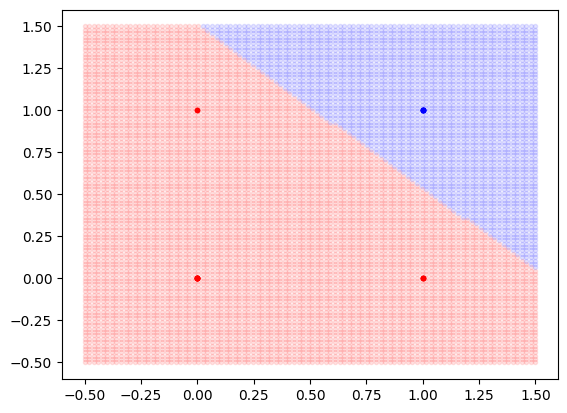

In [31]:
N_teste = 20 # número de pontos de teste

x_teste = np.random.uniform(0, 1, (N_teste, 2))
x_teste = 1*(x_teste > 0.5)
d_teste = 1*(np.logical_and(x_teste[:, 0], x_teste[:, 1]))

# Inserindo 1's no vetor de entrada
b = np.ones((N_teste, 1))
x_teste = np.hstack((b, x_teste))
v_teste = x_teste @ Wfinal
y_teste = np.heaviside(v_teste, 0)

# Taxa de erro
Taxa_de_erro = 100 - np.mean(y_teste == d_teste) * 100

print(f"Taxa de erro: {Taxa_de_erro:.2f}%")


# Gera a curva de separação das duas regiões
# Dados da curva de separação
Nsep = 100
x1S = np.linspace(-0.5, 1.5, Nsep).reshape(-1, 1)
x2S = np.linspace(-0.5, 1.5, Nsep).reshape(-1, 1)

# Gera pontos da grade
xx1S, xx2S = np.meshgrid(x1S, x2S)
xx1S = xx1S.reshape(-1, 1)
xx2S = xx2S.reshape(-1, 1)

# Gera array x
xgrid = np.hstack((xx1S, xx2S))
Ngrid = len(xgrid)
b = np.ones((Ngrid, 1))
xgrid = np.hstack((b, xgrid))

# Calcula saída para cada ponto da grade
ygrid = np.sign(xgrid @ Wfinal)

# Plota os pontos principais
fig, ax2 = plt.subplots()
for i in range(N_teste):
    if d_teste[i] == 1:
        ax2.plot(x_teste[i, 1], x_teste[i, 2], ".b")
    else:
        ax2.plot(x_teste[i, 1], x_teste[i, 2], ".r")

# Plota pontos da grade com saída -1 (usa transparência alpha)
l0 = np.where(ygrid == -1)[0]
ax2.plot(xgrid[l0, 1], xgrid[l0, 2], "r.", alpha=0.1)

# Plota pontos da grade com saída 1 (usa transparência alpha)
l1 = np.where(ygrid == 1)[0]
ax2.plot(xgrid[l1, 1], xgrid[l1, 2], "b.", alpha=0.1)
#############



### Porta lógica OR - Erro Quadrático Médio

In [32]:
Nt = 100  # número de pontos de treinamento

# Considerando a porta lógica OR
x = np.random.uniform(0, 1, (Nt, 2))
x = 1*(x > 0.5)
d = 1*(np.logical_or(x[:, 0], x[:, 1]))
#############

In [33]:
eta = 0.5  # passo de adaptação do algoritmo de Rosenblatt
Nb = 20
Ne = 200
dw = 2

W = Rosenblatt_minibatch_MSE(x, d, eta, Nt, Ne, Nb, dw)

Wfinal = W[-1, :]
print(Wfinal)

[-1.33897039  3.58531785  3.42325409]


5


Text(0.5, 1.0, 'Pesos de Rosenblatt no modo mini-batch (em preto)')

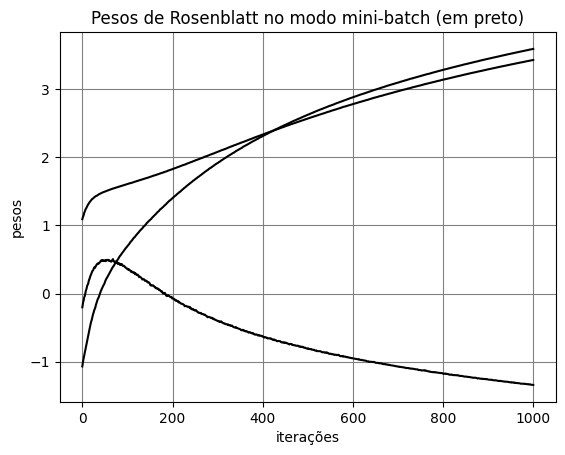

In [34]:
# Gere um gráfico para mostrar os pesos e bias ao longo das iterações
Nmb = int(np.floor(Nt / Nb))
print(Nmb)
plt.plot(W, "k", label="Rosenblatt")
plt.xlabel("iterações")
plt.ylabel("pesos")
plt.grid(axis="x", color="0.5")
plt.grid(axis="y", color="0.5")
plt.title(
    "Pesos de Rosenblatt no modo mini-batch (em preto)"
)

Taxa de erro: 0.00%


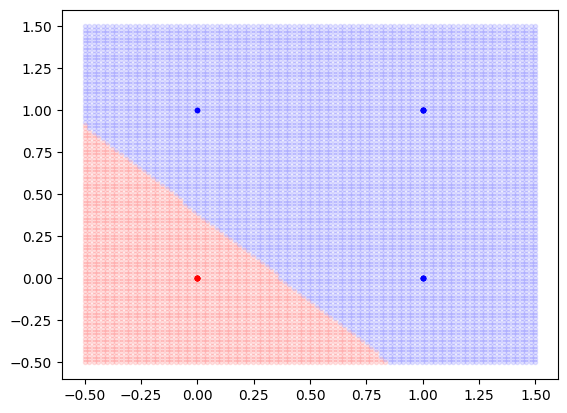

In [35]:
N_teste = 20 # número de pontos de teste

x_teste = np.random.uniform(0, 1, (N_teste, 2))
x_teste = 1*(x_teste > 0.5)
d_teste = 1*(np.logical_or(x_teste[:, 0], x_teste[:, 1]))

# Inserindo 1's no vetor de entrada
b = np.ones((N_teste, 1))
x_teste = np.hstack((b, x_teste))
v_teste = x_teste @ Wfinal
y_teste = np.heaviside(v_teste, 0)

# Taxa de erro
Taxa_de_erro = 100 - np.mean(y_teste == d_teste) * 100

print(f"Taxa de erro: {Taxa_de_erro:.2f}%")


# Gera a curva de separação das duas regiões
# Dados da curva de separação
Nsep = 100
x1S = np.linspace(-0.5, 1.5, Nsep).reshape(-1, 1)
x2S = np.linspace(-0.5, 1.5, Nsep).reshape(-1, 1)

# Gera pontos da grade
xx1S, xx2S = np.meshgrid(x1S, x2S)
xx1S = xx1S.reshape(-1, 1)
xx2S = xx2S.reshape(-1, 1)

# Gera array x
xgrid = np.hstack((xx1S, xx2S))
Ngrid = len(xgrid)
b = np.ones((Ngrid, 1))
xgrid = np.hstack((b, xgrid))

# Calcula saída para cada ponto da grade
ygrid = np.sign(xgrid @ Wfinal)

# Plota os pontos principais
fig, ax2 = plt.subplots()
for i in range(N_teste):
    if d_teste[i] == 1:
        ax2.plot(x_teste[i, 1], x_teste[i, 2], ".b")
    else:
        ax2.plot(x_teste[i, 1], x_teste[i, 2], ".r")

# Plota pontos da grade com saída -1 (usa transparência alpha)
l0 = np.where(ygrid == -1)[0]
ax2.plot(xgrid[l0, 1], xgrid[l0, 2], "r.", alpha=0.1)

# Plota pontos da grade com saída 1 (usa transparência alpha)
l1 = np.where(ygrid == 1)[0]
ax2.plot(xgrid[l1, 1], xgrid[l1, 2], "b.", alpha=0.1)
#############



### Porta lógica OR - Entropia Cruzada

In [36]:
Nt = 100  # número de pontos de treinamento

# Considerando a porta lógica OR
x = np.random.uniform(0, 1, (Nt, 2))
x = 1*(x > 0.5)
d = 1*(np.logical_or(x[:, 0], x[:, 1]))
#############

In [37]:
eta = 0.5  # passo de adaptação do algoritmo de Rosenblatt
Nb = 20
Ne = 200
dw = 2

W = Rosenblatt_minibatch_EC(x, d, eta, Nt, Ne, Nb, dw)

Wfinal = W[-1, :]
print(Wfinal)

[-3.57732632  7.56556921  7.46119803]


5


Text(0.5, 1.0, 'Pesos de Rosenblatt no modo mini-batch (em preto)')

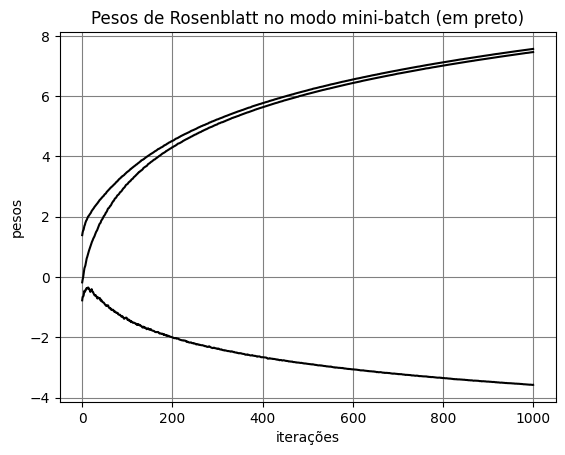

In [38]:
# Gere um gráfico para mostrar os pesos e bias ao longo das iterações
Nmb = int(np.floor(Nt / Nb))
print(Nmb)
plt.plot(W, "k", label="Rosenblatt")
plt.xlabel("iterações")
plt.ylabel("pesos")
plt.grid(axis="x", color="0.5")
plt.grid(axis="y", color="0.5")
plt.title(
    "Pesos de Rosenblatt no modo mini-batch (em preto)"
)

Taxa de erro: 0.00%


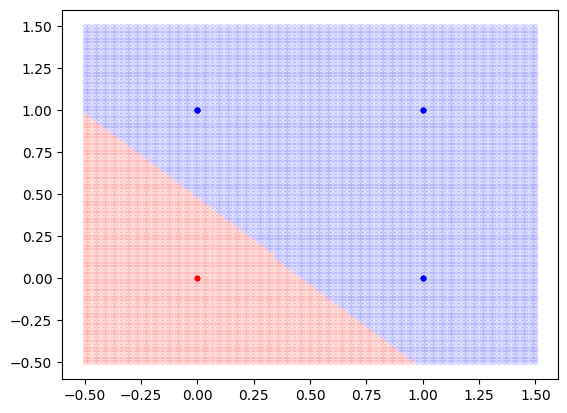

In [39]:
N_teste = 20 # número de pontos de teste

x_teste = np.random.uniform(0, 1, (N_teste, 2))
x_teste = 1*(x_teste > 0.5)
d_teste = 1*(np.logical_or(x_teste[:, 0], x_teste[:, 1]))

# Inserindo 1's no vetor de entrada
b = np.ones((N_teste, 1))
x_teste = np.hstack((b, x_teste))
v_teste = x_teste @ Wfinal
y_teste = np.heaviside(v_teste, 0)

# Taxa de erro
Taxa_de_erro = 100 - np.mean(y_teste == d_teste) * 100

print(f"Taxa de erro: {Taxa_de_erro:.2f}%")


# Gera a curva de separação das duas regiões
# Dados da curva de separação
Nsep = 100
x1S = np.linspace(-0.5, 1.5, Nsep).reshape(-1, 1)
x2S = np.linspace(-0.5, 1.5, Nsep).reshape(-1, 1)

# Gera pontos da grade
xx1S, xx2S = np.meshgrid(x1S, x2S)
xx1S = xx1S.reshape(-1, 1)
xx2S = xx2S.reshape(-1, 1)

# Gera array x
xgrid = np.hstack((xx1S, xx2S))
Ngrid = len(xgrid)
b = np.ones((Ngrid, 1))
xgrid = np.hstack((b, xgrid))

# Calcula saída para cada ponto da grade
ygrid = np.sign(xgrid @ Wfinal)

# Plota os pontos principais
fig, ax2 = plt.subplots()
for i in range(N_teste):
    if d_teste[i] == 1:
        ax2.plot(x_teste[i, 1], x_teste[i, 2], ".b")
    else:
        ax2.plot(x_teste[i, 1], x_teste[i, 2], ".r")

# Plota pontos da grade com saída -1 (usa transparência alpha)
l0 = np.where(ygrid == -1)[0]
ax2.plot(xgrid[l0, 1], xgrid[l0, 2], "r.", alpha=0.1)

# Plota pontos da grade com saída 1 (usa transparência alpha)
l1 = np.where(ygrid == 1)[0]
ax2.plot(xgrid[l1, 1], xgrid[l1, 2], "b.", alpha=0.1)
#############



### Porta lógica XOR - Erro Quadrático Médio

In [40]:
Nt = 100  # número de pontos de treinamento

# Considerando a porta lógica OR
x = np.random.uniform(0, 1, (Nt, 2))
x = 1*(x > 0.5)
d = 1*(np.logical_xor(x[:, 0], x[:, 1]))
#############

In [41]:
eta = 0.5  # passo de adaptação do algoritmo de Rosenblatt
Nb = 20
Ne = 200
dw = 2

W = Rosenblatt_minibatch_MSE(x, d, eta, Nt, Ne, Nb, dw)

Wfinal = W[-1, :]
print(Wfinal)

[-0.27032848  0.49862831  0.37480599]


5


Text(0.5, 1.0, 'Pesos de Rosenblatt no modo mini-batch (em preto)')

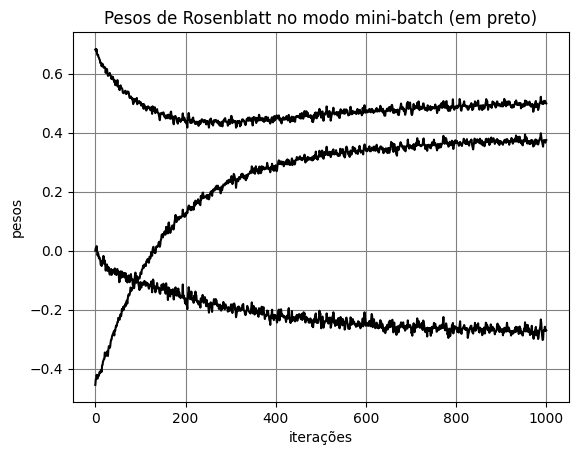

In [42]:
# Gere um gráfico para mostrar os pesos e bias ao longo das iterações
Nmb = int(np.floor(Nt / Nb))
print(Nmb)
plt.plot(W, "k", label="Rosenblatt")
plt.xlabel("iterações")
plt.ylabel("pesos")
plt.grid(axis="x", color="0.5")
plt.grid(axis="y", color="0.5")
plt.title(
    "Pesos de Rosenblatt no modo mini-batch (em preto)"
)

Taxa de erro: 25.00%


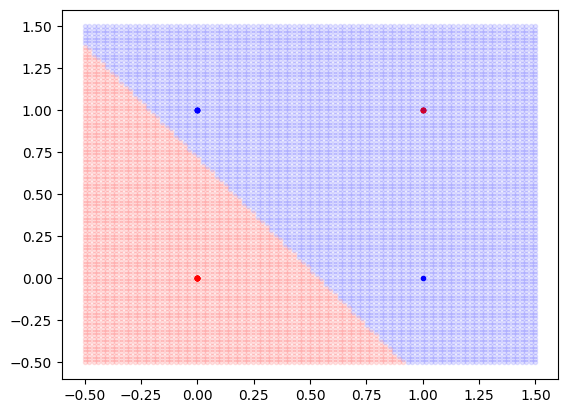

In [43]:
N_teste = 20 # número de pontos de teste

x_teste = np.random.uniform(0, 1, (N_teste, 2))
x_teste = 1*(x_teste > 0.5)
d_teste = 1*(np.logical_xor(x_teste[:, 0], x_teste[:, 1]))

# Inserindo 1's no vetor de entrada
b = np.ones((N_teste, 1))
x_teste = np.hstack((b, x_teste))
v_teste = x_teste @ Wfinal
y_teste = np.heaviside(v_teste, 0)

# Taxa de erro
Taxa_de_erro = 100 - np.mean(y_teste == d_teste) * 100

print(f"Taxa de erro: {Taxa_de_erro:.2f}%")


# Gera a curva de separação das duas regiões
# Dados da curva de separação
Nsep = 100
x1S = np.linspace(-0.5, 1.5, Nsep).reshape(-1, 1)
x2S = np.linspace(-0.5, 1.5, Nsep).reshape(-1, 1)

# Gera pontos da grade
xx1S, xx2S = np.meshgrid(x1S, x2S)
xx1S = xx1S.reshape(-1, 1)
xx2S = xx2S.reshape(-1, 1)

# Gera array x
xgrid = np.hstack((xx1S, xx2S))
Ngrid = len(xgrid)
b = np.ones((Ngrid, 1))
xgrid = np.hstack((b, xgrid))

# Calcula saída para cada ponto da grade
ygrid = np.sign(xgrid @ Wfinal)

# Plota os pontos principais
fig, ax2 = plt.subplots()
for i in range(N_teste):
    if d_teste[i] == 1:
        ax2.plot(x_teste[i, 1], x_teste[i, 2], ".b")
    else:
        ax2.plot(x_teste[i, 1], x_teste[i, 2], ".r")

# Plota pontos da grade com saída -1 (usa transparência alpha)
l0 = np.where(ygrid == -1)[0]
ax2.plot(xgrid[l0, 1], xgrid[l0, 2], "r.", alpha=0.1)

# Plota pontos da grade com saída 1 (usa transparência alpha)
l1 = np.where(ygrid == 1)[0]
ax2.plot(xgrid[l1, 1], xgrid[l1, 2], "b.", alpha=0.1)
#############



### Porta lógica XOR - Entropia Cruzada

In [44]:
Nt = 100  # número de pontos de treinamento

# Considerando a porta lógica OR
x = np.random.uniform(0, 1, (Nt, 2))
x = 1*(x > 0.5)
d = 1*(np.logical_xor(x[:, 0], x[:, 1]))
#############

In [45]:
eta = 0.5  # passo de adaptação do algoritmo de Rosenblatt
Nb = 20
Ne = 200
dw = 2

W = Rosenblatt_minibatch_EC(x, d, eta, Nt, Ne, Nb, dw)

Wfinal = W[-1, :]
print(Wfinal)

[-0.18690404  0.46897243 -0.07217522]


5


Text(0.5, 1.0, 'Pesos de Rosenblatt no modo mini-batch (em preto)')

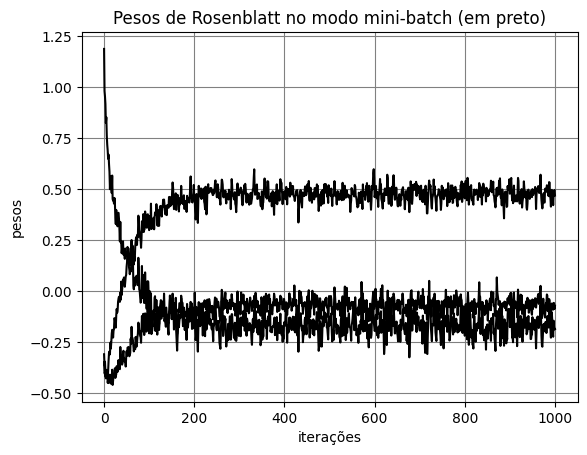

In [46]:
# Gere um gráfico para mostrar os pesos e bias ao longo das iterações
Nmb = int(np.floor(Nt / Nb))
print(Nmb)
plt.plot(W, "k", label="Rosenblatt")
plt.xlabel("iterações")
plt.ylabel("pesos")
plt.grid(axis="x", color="0.5")
plt.grid(axis="y", color="0.5")
plt.title(
    "Pesos de Rosenblatt no modo mini-batch (em preto)"
)

Taxa de erro: 45.00%


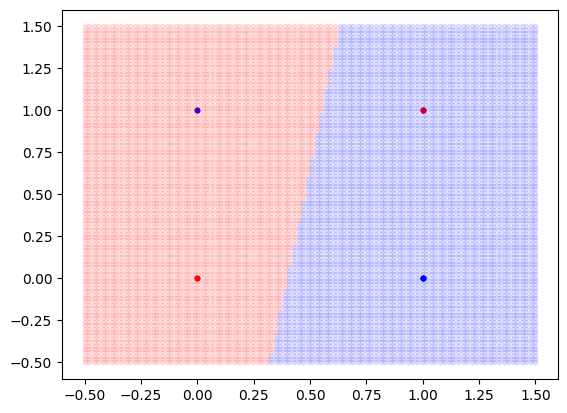

In [47]:
N_teste = 20 # número de pontos de teste

x_teste = np.random.uniform(0, 1, (N_teste, 2))
x_teste = 1*(x_teste > 0.5)
d_teste = 1*(np.logical_xor(x_teste[:, 0], x_teste[:, 1]))

# Inserindo 1's no vetor de entrada
b = np.ones((N_teste, 1))
x_teste = np.hstack((b, x_teste))
v_teste = x_teste @ Wfinal
y_teste = np.heaviside(v_teste, 0)

# Taxa de erro
Taxa_de_erro = 100 - np.mean(y_teste == d_teste) * 100

print(f"Taxa de erro: {Taxa_de_erro:.2f}%")


# Gera a curva de separação das duas regiões
# Dados da curva de separação
Nsep = 100
x1S = np.linspace(-0.5, 1.5, Nsep).reshape(-1, 1)
x2S = np.linspace(-0.5, 1.5, Nsep).reshape(-1, 1)

# Gera pontos da grade
xx1S, xx2S = np.meshgrid(x1S, x2S)
xx1S = xx1S.reshape(-1, 1)
xx2S = xx2S.reshape(-1, 1)

# Gera array x
xgrid = np.hstack((xx1S, xx2S))
Ngrid = len(xgrid)
b = np.ones((Ngrid, 1))
xgrid = np.hstack((b, xgrid))

# Calcula saída para cada ponto da grade
ygrid = np.sign(xgrid @ Wfinal)

# Plota os pontos principais
fig, ax2 = plt.subplots()
for i in range(N_teste):
    if d_teste[i] == 1:
        ax2.plot(x_teste[i, 1], x_teste[i, 2], ".b")
    else:
        ax2.plot(x_teste[i, 1], x_teste[i, 2], ".r")

# Plota pontos da grade com saída -1 (usa transparência alpha)
l0 = np.where(ygrid == -1)[0]
ax2.plot(xgrid[l0, 1], xgrid[l0, 2], "r.", alpha=0.1)

# Plota pontos da grade com saída 1 (usa transparência alpha)
l1 = np.where(ygrid == 1)[0]
ax2.plot(xgrid[l1, 1], xgrid[l1, 2], "b.", alpha=0.1)
#############

